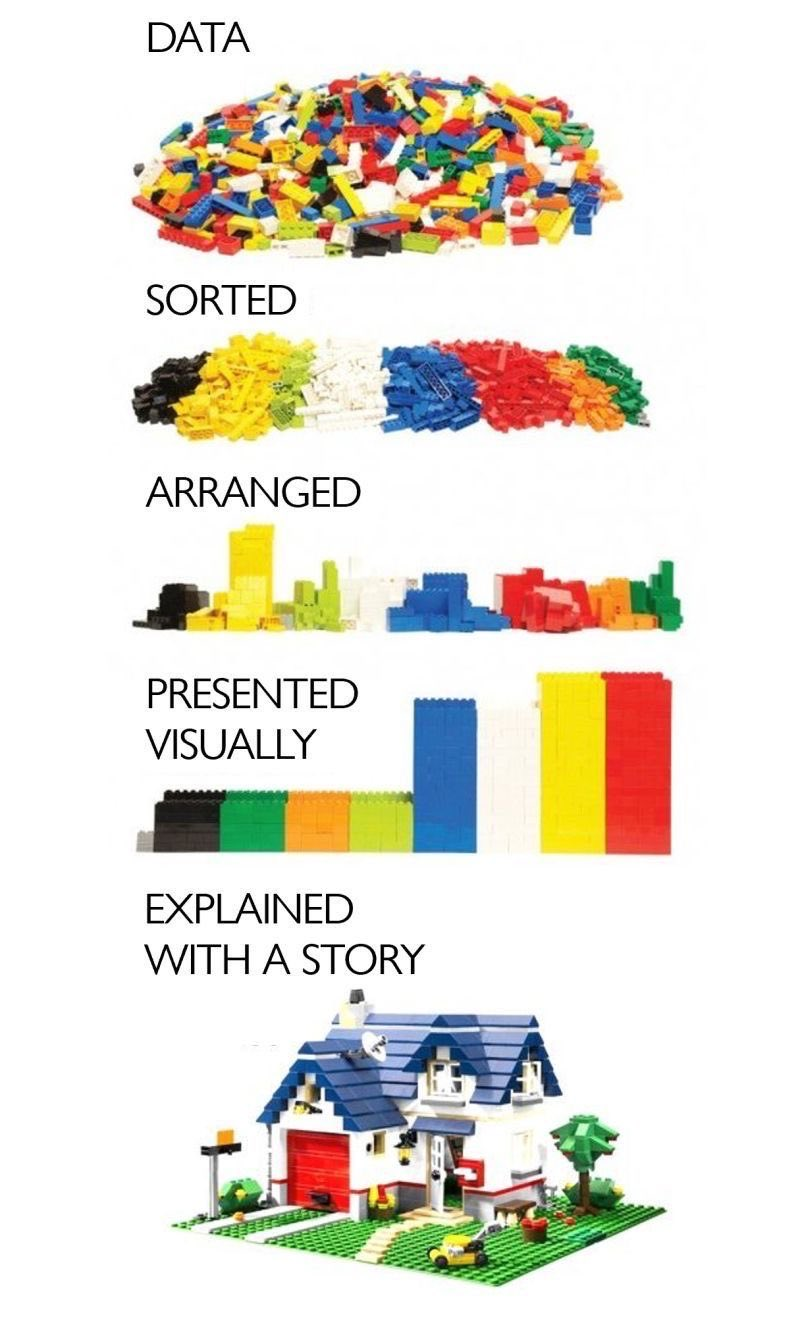

# Steps for making report final project


1.   Reading and Understanding Data
2.   Exploratory Data Analysis
        - Data Cleaning
        - Univariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis
3.   Outliers Treatment
4.   Scaling Data
5.   Creating k means clustering and visualizing clusters formed
6.   Report countries








## Overview DATASET

diambil dari website kaggle.com <a href="https://www.kaggle.com/robbyfuad/help-international">visit link</a>

download <a href="https://drive.google.com/uc?export=download&id=1WrbvqsWUUlqFStXHyFmrzBmr-1E99lf9">Data_Negara_HELP.csv</a>


## Step 1: Reading and Understanding Data

In [64]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [65]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [66]:
df_dict = pd.read_csv('Keterangan_Data.csv')
df_dict

,Nama Kolom,Deskripsi
0,Negara,Nama negara
1,Kematian_anak,Kematian anak di bawah usia 5 tahun per 1000 ...
2,Ekspor,Ekspor barang dan jasa perkapita
3,Kesehatan,Total pengeluaran kesehatan perkapita
4,Impor,Impor barang dan jasa perkapita
5,Pendapatan,Penghasilan bersih perorang
6,Inflasi,Pengukuran tingkat pertumbuhan tahunan dari T...
7,Harapan_hidup,Jumlah tahun rata-rata seorang anak yang baru...
8,Jumlah_fertiliti,Jumlah anak yang akan lahir dari setiap wanit...
9,GDPperkapita,GDP per kapita. Dihitung sebagai Total GDP di...


In [67]:
df.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [68]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## EDA

#### Univariate analysis

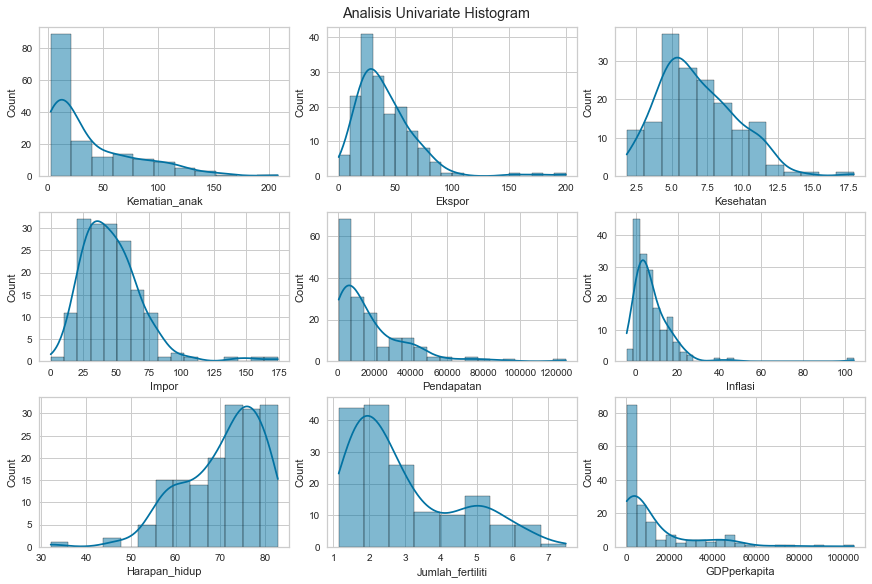

In [69]:
# histplot
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)
plt.suptitle("Analisis Univariate Histogram")
ax=ax.flatten()
colhist = df.select_dtypes(exclude='object').columns
for i, j in enumerate(colhist):
    sns.histplot(df[j], ax=ax[i], kde=True)

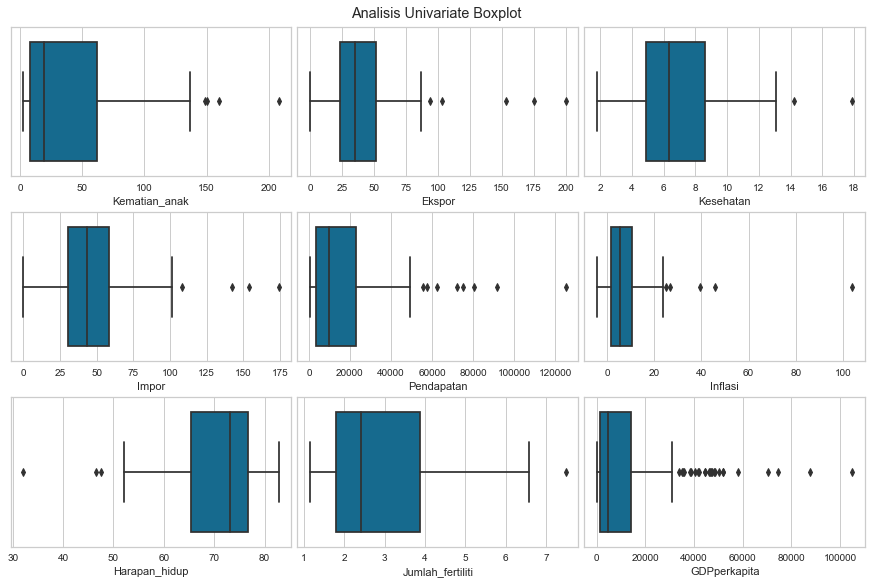

In [70]:
# boxplot
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)
plt.suptitle("Analisis Univariate Boxplot")
ax=ax.flatten()
colbox = df.select_dtypes(exclude='object').columns
for i, j in enumerate(colbox):
    sns.boxplot(x=df[j], ax=ax[i])

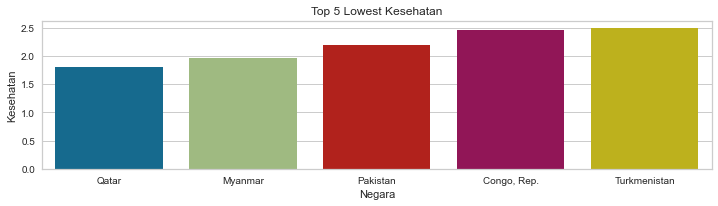

In [71]:
# Barplot
kesehatan = df.sort_values('Kesehatan', ascending = True)
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
sns.barplot(kesehatan.Negara.head(), kesehatan.Kesehatan.head())
plt.title('Top 5 Lowest Kesehatan')
plt.show()

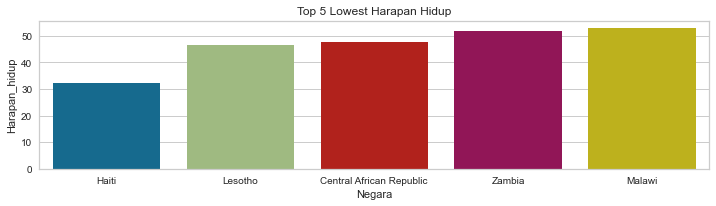

In [72]:
kesehatan = df.sort_values('Harapan_hidup', ascending = True)
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
sns.barplot(kesehatan.Negara.head(), kesehatan.Harapan_hidup.head())
plt.title('Top 5 Lowest Harapan Hidup')
plt.show()

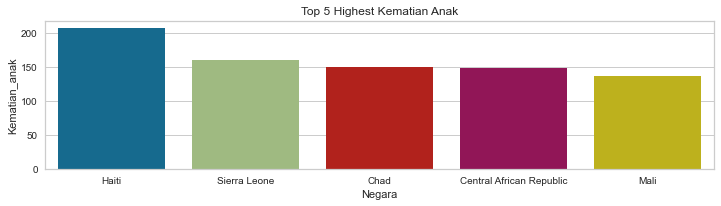

In [112]:
kesehatan = df.sort_values('Kematian_anak', ascending = False)
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
sns.barplot(kesehatan.Negara.head(), kesehatan.Kematian_anak.head())
plt.title('Top 5 Highest Kematian Anak')
plt.show()

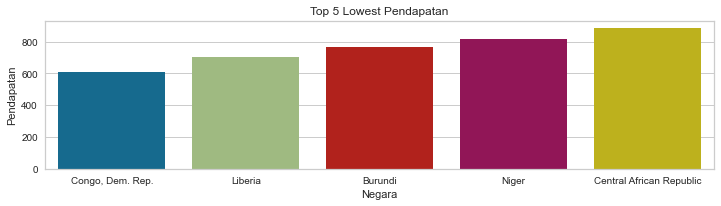

In [74]:
pendapatan = df.sort_values('Pendapatan', ascending = True)
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
sns.barplot(pendapatan.Negara.head(), pendapatan.Pendapatan.head())
plt.title('Top 5 Lowest Pendapatan')
plt.show()

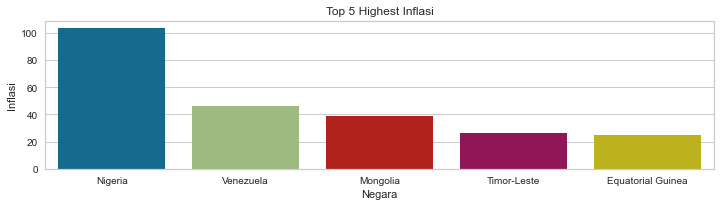

In [113]:
pendapatan = df.sort_values('Inflasi', ascending = False)
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
sns.barplot(pendapatan.Negara.head(), pendapatan.Inflasi.head())
plt.title('Top 5 Highest Inflasi')
plt.show()

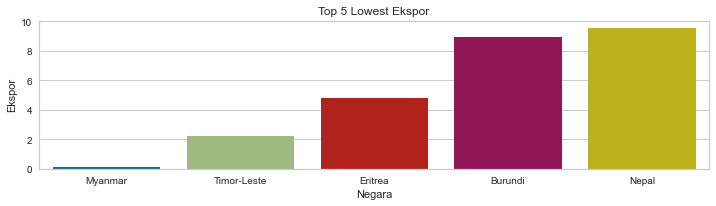

In [114]:
pendapatan = df.sort_values('Ekspor', ascending = True)
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
sns.barplot(pendapatan.Negara.head(), pendapatan.Ekspor.head())
plt.title('Top 5 Lowest Ekspor')
plt.show()

#### Bivariate Analysis

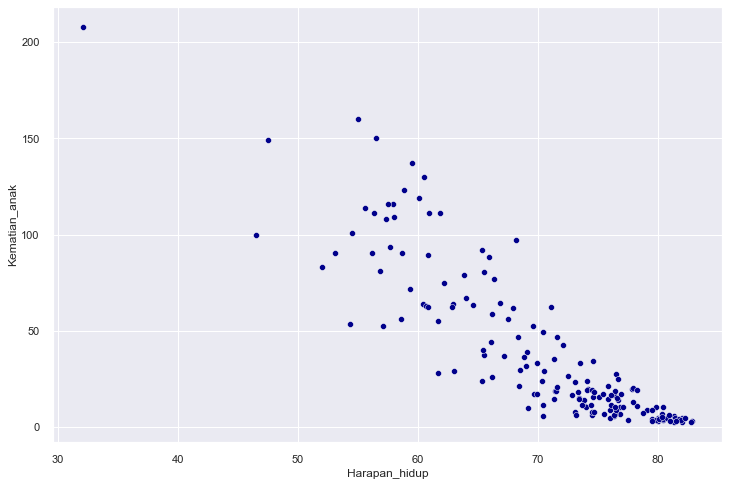

In [118]:
# Pairplot
plt.figure(figsize = (12,8))
sns.set_theme(style = 'darkgrid')
sns.scatterplot('Harapan_hidup', 'Kematian_anak', data = df, color = 'darkblue')
plt.show()

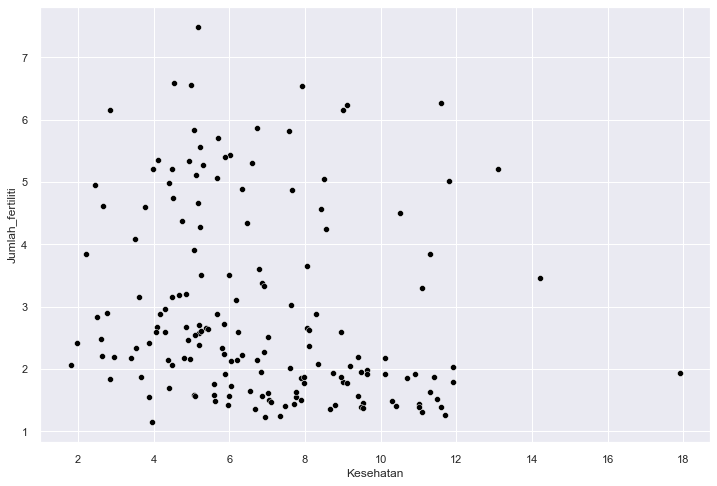

In [119]:
plt.figure(figsize = (12,8))
sns.set_theme(style = 'darkgrid')
sns.scatterplot('Kesehatan', 'Jumlah_fertiliti', data = df, color = 'black')
plt.show()

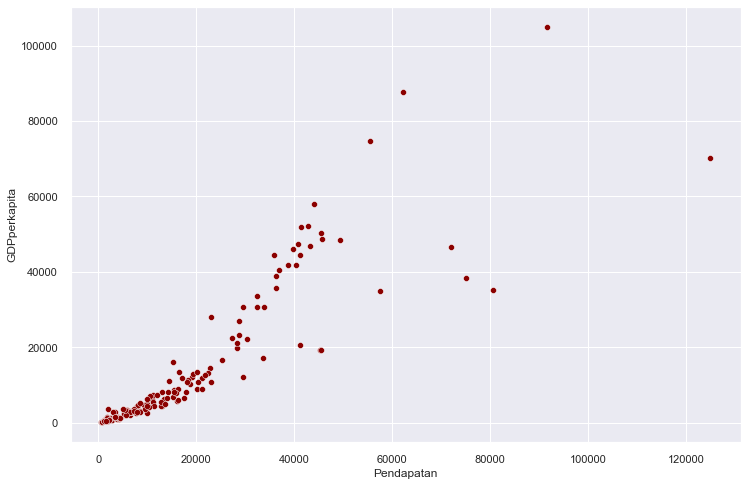

In [120]:
plt.figure(figsize = (12,8))
sns.set_theme(style = 'darkgrid')
sns.scatterplot('Pendapatan', 'GDPperkapita', data = df, color = 'Darkred')
plt.show()

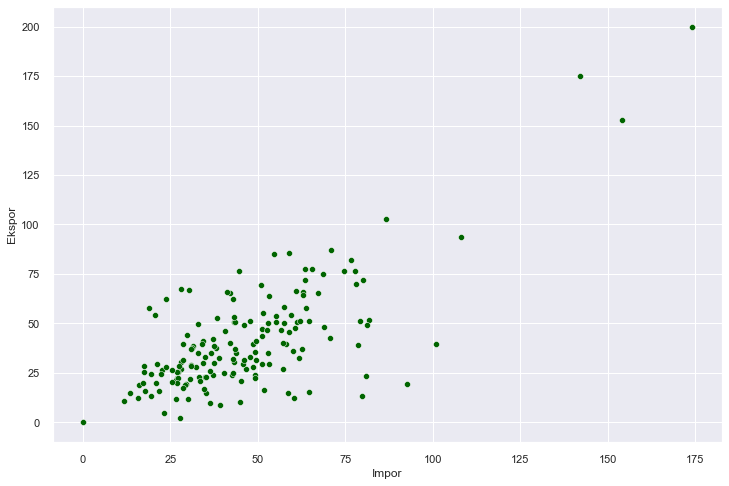

In [121]:
plt.figure(figsize = (12,8))
sns.set_theme(style = 'darkgrid')
sns.scatterplot('Impor', 'Ekspor', data = df, color = 'Darkgreen')
plt.show()

#### Multivariate Analysis

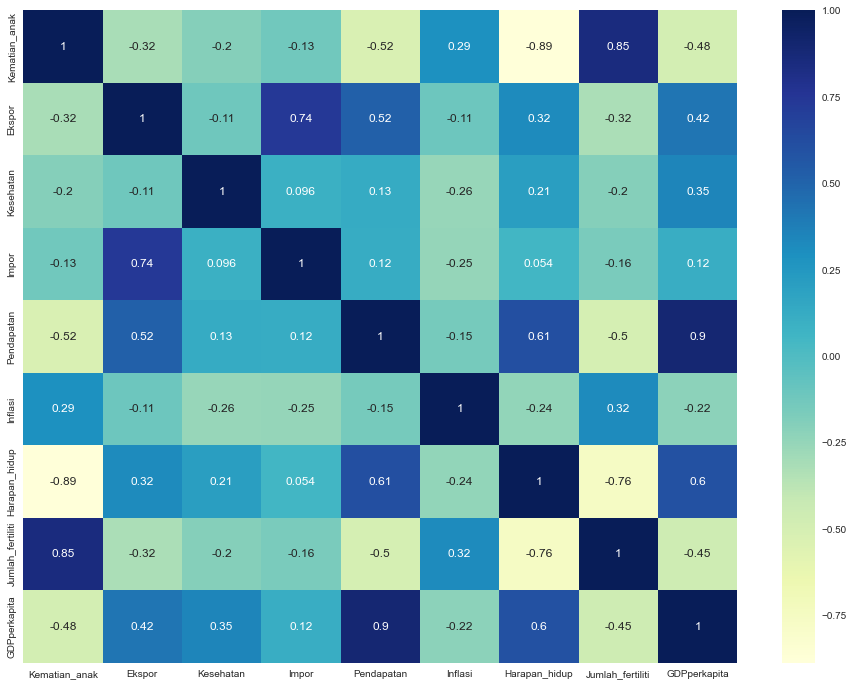

In [117]:
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), annot = True, fmt = '.2g', cmap = 'YlGnBu')
plt.show()

## Outlier Treatment

Ways of outlier treatment:
1. Trimming/Remove outliers
2. Quantile based flooring and capping
3. Median Imputation

link:
https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

sns.boxplot('Pendapatan', data = df)
plt.show()
sns.boxplot('GDPperkapita', data = df)
plt.show()
sns.boxplot('Jumlah_fertiliti', data = df)
plt.show()
sns.boxplot('Kematian_anak', data = df)
plt.show()

# menemukan data outlier
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_find_outlier = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_find_outlier

print(finding_outlier(df['Pendapatan']))
print(finding_outlier(df['GDPperkapita']))

# hapus data outlier dengan filter
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_remove_outlier = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_remove_outlier

Q3 = df.quantile(0.75)
Q3

df_final = remove_outlier(df[['Pendapatan','GDPperkapita']])
df_final.dropna(axis=0, inplace=True)
df_final

sns.boxplot('Pendapatan', data = df_final)
plt.show()
sns.boxplot('GDPperkapita', data = df_final)
plt.show()

## Split Dataframe yang ingin di Analysa

In [77]:
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


df_Pendapatan_GDP = df.iloc[:, 2:4]
df_split.head()

### Clustering

## 1. Pendapatan vs GDPPerkapita

In [78]:
df_ekonomi = df.loc[:, ['Pendapatan', 'GDPperkapita']]
df_ekonomi

,Pendapatan,GDPperkapita
0,1610,553
1,9930,4090
2,12900,4460
3,5900,3530
4,19100,12200
...,...,...
162,2950,2970
163,16500,13500
164,4490,1310
165,4480,1310


## Scaling Data dengan StandardScaler

In [79]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std_ekonomi = sc.fit_transform(df_ekonomi)


In [80]:
df_ekonomi.describe()

,Pendapatan,GDPperkapita
count,167.000000,167.000000
mean,17144.688623,12964.155689
std,19278.067698,18328.704809
min,609.000000,231.000000
25%,3355.000000,1330.000000
50%,9960.000000,4660.000000
75%,22800.000000,14050.000000
max,125000.000000,105000.000000


In [81]:
pd.DataFrame(df_std_ekonomi).describe()

,0,1
count,1.670000e+02,1.670000e+02
mean,-7.977650e-17,5.850277e-17
std,1.003008e+00,1.003008e+00
min,-8.603259e-01,-6.968005e-01
25%,-7.174558e-01,-6.366596e-01
50%,-3.738080e-01,-4.544309e-01
75%,2.942370e-01,5.942100e-02
max,5.611542e+00,5.036507e+00


## K-Means

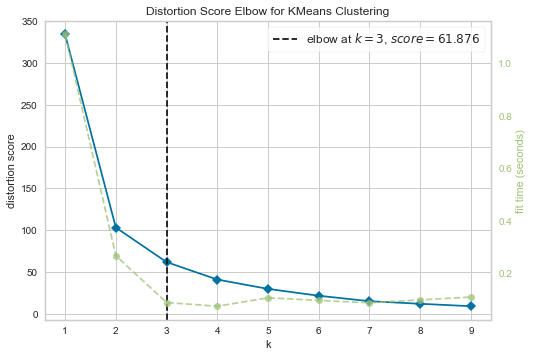

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
#K-cluster with elbow score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# menentukan jumlah klustering dari 1 - 10 (x)
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(df_std_ekonomi)
visualize.poof()

In [83]:
#clustering with KMeans
from sklearn.cluster import KMeans

model_kmeans1 = KMeans(n_clusters = 2, init='k-means++', random_state=42).fit(df_std_ekonomi)
labels1 = model_kmeans1.labels_

In [84]:
new_df_std_ekonomi = pd.DataFrame(data=df_std_ekonomi, columns=['Pendapatan', 'GDPperkapita'])
new_df_std_ekonomi['label_kmeans'] = labels1
new_df_std_ekonomi

,Pendapatan,GDPperkapita,label_kmeans
0,-0.808245,-0.679180,0
1,-0.375369,-0.485623,0
2,-0.220844,-0.465376,0
3,-0.585043,-0.516268,0
4,0.101732,-0.041817,0
...,...,...,...
162,-0.738527,-0.546913,0
163,-0.033542,0.029323,0
164,-0.658404,-0.637754,0
165,-0.658924,-0.637754,0


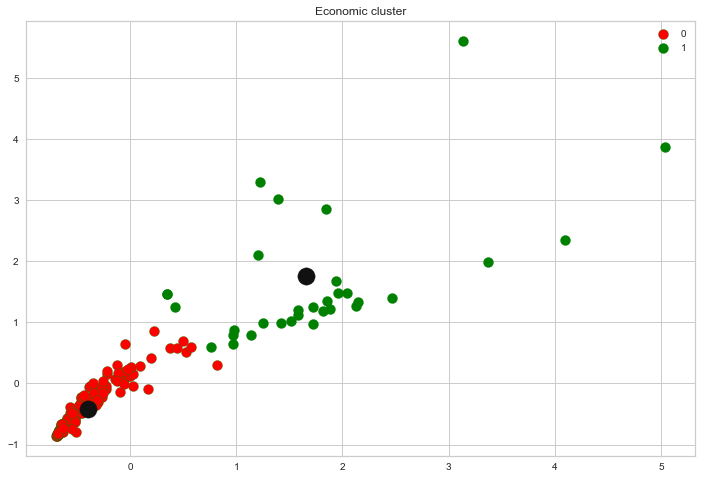

In [85]:
fig = plt.figure(figsize=(12,8))

plt.scatter(new_df_std_ekonomi['GDPperkapita'][new_df_std_ekonomi.label_kmeans==0], new_df_std_ekonomi['Pendapatan'][new_df_std_ekonomi.label_kmeans==0], label=0, c='red', s=100, edgecolors='green')
plt.scatter(new_df_std_ekonomi['GDPperkapita'][new_df_std_ekonomi.label_kmeans==1], new_df_std_ekonomi['Pendapatan'][new_df_std_ekonomi.label_kmeans==1], label=1, c='green', s=100, edgecolors='green')

plt.scatter(model_kmeans1.cluster_centers_[:,0], model_kmeans1.cluster_centers_[:,1], c='k', s=300)

plt.legend()
plt.title('Economic cluster')
plt.show()

In [86]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std_ekonomi, labels=labels1))

0.7272625121110462


## Inverse Transform

Inverse Transform

In [87]:
from sklearn.cluster import KMeans
kmeansA = KMeans(n_clusters = 2, init='k-means++', random_state=42)
kmeansA = kmeansA.fit(df_std_ekonomi)
labelsA = kmeansA.labels_
labelsA

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [88]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std_ekonomi), columns=['Pendapatan', 'GDPperkapita'])
new_df1['label1_kmeans'] = labelsA
new_df1

,Pendapatan,GDPperkapita,label1_kmeans
0,1610.0,553.0,0
1,9930.0,4090.0,0
2,12900.0,4460.0,0
3,5900.0,3530.0,0
4,19100.0,12200.0,0
...,...,...,...
162,2950.0,2970.0,0
163,16500.0,13500.0,0
164,4490.0,1310.0,0
165,4480.0,1310.0,0


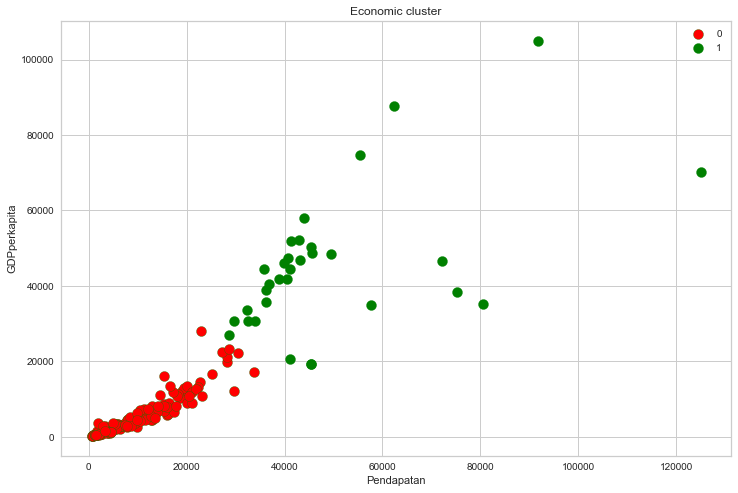

In [89]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Pendapatan'][new_df1.label1_kmeans == 0], new_df1['GDPperkapita'][new_df1.label1_kmeans == 0], c='red', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['Pendapatan'][new_df1.label1_kmeans == 1], new_df1['GDPperkapita'][new_df1.label1_kmeans == 1], c='green', label='1', s=100, edgecolor='green')

# plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Economic cluster')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

## summary to main data

In [90]:
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [91]:
new_df1

,Pendapatan,GDPperkapita,label1_kmeans
0,1610.0,553.0,0
1,9930.0,4090.0,0
2,12900.0,4460.0,0
3,5900.0,3530.0,0
4,19100.0,12200.0,0
...,...,...,...
162,2950.0,2970.0,0
163,16500.0,13500.0,0
164,4490.0,1310.0,0
165,4480.0,1310.0,0


In [92]:
#summary to main data
labels = new_df1.drop(['Pendapatan', 'GDPperkapita'], axis=1)
df_final_ekonomi = pd.concat((df,labels),axis=1)

df_final_ekonomi['label1_kmeans'] = df_final_ekonomi['label1_kmeans'].astype('object')
df_final_ekonomi = df_final_ekonomi.rename({'label1_kmeans' : 'Cluster'}, axis=1)
df_final_ekonomi


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [93]:
lowest_ekonomi = df_final_ekonomi[df_final_ekonomi['Cluster']==0]
lowest_ekonomi

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [122]:
lowest_ekonomi.sort_values(by=['Pendapatan'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0


In [123]:
lowest_ekonomi.sort_values(by=['GDPperkapita'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0


## Kesimpulan Faktor Ekonomi

Congo, Dem. Rep. , Liberia dan Burundi merupakan 3 Negara terendah dalam faktor ekonomi berdasarkan hasil clustering dan filtering

In [124]:
lowest_ekonomi.sort_values(by=['Pendapatan', 'GDPperkapita'], ascending=[True, True])[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0


## 2. Jumlah_fertiliti & Kematian_anak

In [97]:
df_kesehatan = df.loc[:, ['Kematian_anak', 'Jumlah_fertiliti']]
df_kesehatan

,Kematian_anak,Jumlah_fertiliti
0,90.2,5.82
1,16.6,1.65
2,27.3,2.89
3,119.0,6.16
4,10.3,2.13
...,...,...
162,29.2,3.50
163,17.1,2.47
164,23.3,1.95
165,56.3,4.67


### Scaling Data dengan StandardScaler

In [98]:
df_std_kesehatan = sc.fit_transform(df_kesehatan)
df_std_kesehatan

array([[ 1.29153238,  1.90288227],
       [-0.5389489 , -0.85997281],
       [-0.27283273, -0.0384044 ],
       [ 2.00780766,  2.12815103],
       [-0.69563412, -0.54194633],
       [-0.5911773 , -0.38293309],
       [-0.50164289, -0.83347061],
       [-0.8324228 , -0.67445736],
       [-0.84485813, -0.9991094 ],
       [ 0.02312823, -0.68108292],
       [-0.60858677, -0.72083623],
       [-0.73791425, -0.52206967],
       [ 0.27680906, -0.40943529],
       [-0.5986385 , -0.77384064],
       [-0.81501333, -0.96598164],
       [-0.839884  , -0.72083623],
       [-0.48423342, -0.15766433],
       [ 1.8088423 ,  1.59810689],
       [ 0.11017558, -0.37630754],
       [ 0.20717119,  0.16698771],
       [-0.78019439, -1.08524157],
       [ 0.35390814, -0.04502995],
       [-0.45936275, -0.76058954],
       [-0.69065998, -0.73408733],
       [-0.68319878, -0.91297723],
       [ 1.93319565,  1.93601003],
       [ 1.37609265,  2.19440655],
       [ 0.15245571, -0.04502995],
       [ 1.73423029,

### K-Means

In [99]:
#clustering with KMeans
model_kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std_kesehatan)
labels2 = model_kmeans2.labels_

In [100]:
new_df_std_kesehatan = pd.DataFrame(data=df_std_kesehatan, columns=['Kematian_anak', 'Jumlah_fertiliti'])
new_df_std_kesehatan['label_kmeans'] = labels2
new_df_std_kesehatan

,Kematian_anak,Jumlah_fertiliti,label_kmeans
0,1.291532,1.902882,2
1,-0.538949,-0.859973,1
2,-0.272833,-0.038404,0
3,2.007808,2.128151,2
4,-0.695634,-0.541946,1
...,...,...,...
162,-0.225578,0.365754,0
163,-0.526514,-0.316678,1
164,-0.372315,-0.661206,1
165,0.448417,1.140944,0


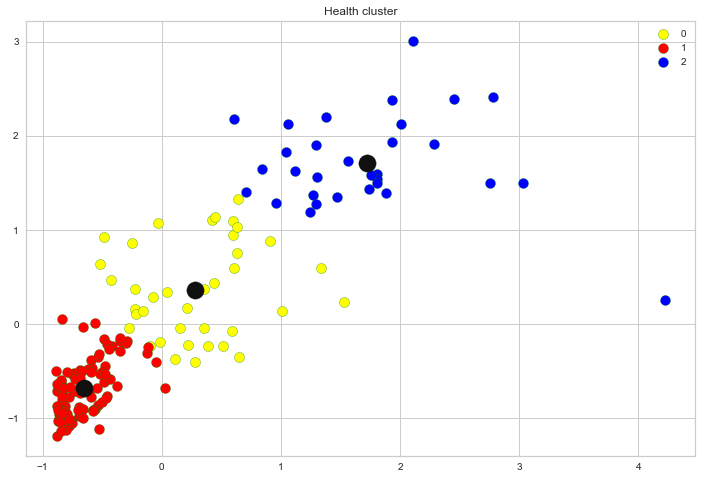

In [101]:
fig = plt.figure(figsize=(12,8))

plt.scatter(new_df_std_kesehatan['Kematian_anak'][new_df_std_kesehatan.label_kmeans==0], new_df_std_kesehatan['Jumlah_fertiliti'][new_df_std_kesehatan.label_kmeans==0], label=0, c='yellow', s=100, edgecolors='green')
plt.scatter(new_df_std_kesehatan['Kematian_anak'][new_df_std_kesehatan.label_kmeans==1], new_df_std_kesehatan['Jumlah_fertiliti'][new_df_std_kesehatan.label_kmeans==1], label=1, c='red', s=100, edgecolors='green')
plt.scatter(new_df_std_kesehatan['Kematian_anak'][new_df_std_kesehatan.label_kmeans==2], new_df_std_kesehatan['Jumlah_fertiliti'][new_df_std_kesehatan.label_kmeans==2], label=2, c='blue', s=100, edgecolors='green')

plt.scatter(model_kmeans2.cluster_centers_[:,0], model_kmeans2.cluster_centers_[:,1], c='k', s=300)

plt.legend()
plt.title('Health cluster')
plt.show()

In [102]:
# silhouette_score

print(silhouette_score(df_std_kesehatan, labels=labels2))

0.5533426647282477


### Inverse Transform

In [103]:
kmeansB = KMeans(n_clusters = 3, init='k-means++', random_state=42)
kmeansB = kmeansB.fit(df_std_kesehatan)
labelsB = kmeansB.labels_
labelsB

array([2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0,
       1, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0,
       2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0,
       1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2])

In [104]:
new_df2 = pd.DataFrame(data=sc.inverse_transform(df_std_kesehatan), columns=['Kematian_anak', 'Jumlah_fertiliti'])
new_df2['label2_kmeans'] = labelsB
new_df2

,Kematian_anak,Jumlah_fertiliti,label2_kmeans
0,90.2,5.82,2
1,16.6,1.65,1
2,27.3,2.89,0
3,119.0,6.16,2
4,10.3,2.13,1
...,...,...,...
162,29.2,3.50,0
163,17.1,2.47,1
164,23.3,1.95,1
165,56.3,4.67,0


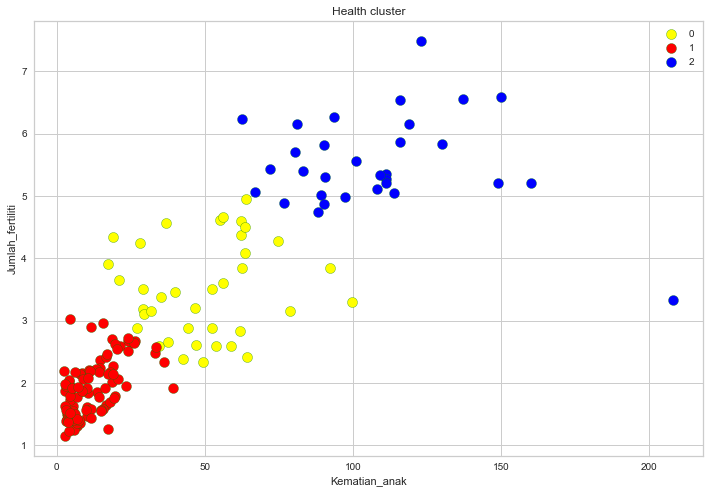

In [105]:
plt.figure(figsize=(12,8))

plt.scatter(new_df2['Kematian_anak'][new_df2.label2_kmeans == 0], new_df2['Jumlah_fertiliti'][new_df2.label2_kmeans == 0], c='yellow', label='0', s=100, edgecolor='green')
plt.scatter(new_df2['Kematian_anak'][new_df2.label2_kmeans == 1], new_df2['Jumlah_fertiliti'][new_df2.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(new_df2['Kematian_anak'][new_df2.label2_kmeans == 2], new_df2['Jumlah_fertiliti'][new_df2.label2_kmeans == 2], c='blue',label = '2', s=100, edgecolor='green')

# plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Health cluster')
plt.xlabel('Kematian_anak')
plt.ylabel('Jumlah_fertiliti')
plt.show()

## summary to main data

In [106]:
#summary to main data
labels = new_df2.drop(['Kematian_anak', 'Jumlah_fertiliti'], axis=1)
df_final_kesehatan = pd.concat((df,labels),axis=1)

df_final_kesehatan['label2_kmeans'] = df_final_kesehatan['label2_kmeans'].astype('object')
df_final_kesehatan = df_final_kesehatan.rename({'label2_kmeans' : 'Cluster'}, axis=1)
df_final_kesehatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [107]:
lowest_kesehatan = df_final_kesehatan[df_final_kesehatan['Cluster']==2]
lowest_kesehatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2


In [108]:
lowest_kesehatan.sort_values(by=['Kematian_anak'],ascending=False)[:31]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708,2
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.000,60.5,5.84,2330,2
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2


In [109]:
lowest_kesehatan.sort_values(by=['Jumlah_fertiliti'],ascending=True)[:31]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2
150,Togo,90.3,40.20,7.65,57.3,1210,1.180,58.7,4.87,488,2
142,Sudan,76.7,19.70,6.32,17.2,3370,19.600,66.3,4.88,1480,2
99,Mauritania,97.4,50.70,4.41,61.2,3320,18.900,68.2,4.98,1200,2
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,2
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,2
129,Senegal,66.8,24.90,5.66,40.3,2180,1.850,64.0,5.06,1000,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,2


## Kesimpulan Faktor Kesehatan

Haiti merupakan Negara terendah dalam faktor kesehatan berdasarkan hasil clustering dan filtering, dimana haiti memiliki angka fertiliti terendah sedangkan angka kematian anak tertinggi.

In [125]:
lowest_kesehatan.sort_values(by=['Kematian_anak', 'Jumlah_fertiliti'], ascending=[False, True])[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,2
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,2
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,2
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,2
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,2
